# DESCRIPTIVE ANALYTICS AND VISUALIZATION

### Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Load data

In [6]:
df = pd.read_csv('user_behavior_data.csv')

### Data exploration

In [7]:
df.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


### Data exploration - column specific

#### Device Model

##### Frequencia absoluta
Number of times each value appears

In [14]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

##### Frecuencia relativa
The proportion of each value's occurrence relative to the total number of data points

In [15]:
df['Device Model'].value_counts(normalize=True)

Device Model
Xiaomi Mi 11          0.208571
iPhone 12             0.208571
Google Pixel 5        0.202857
OnePlus 9             0.190000
Samsung Galaxy S21    0.190000
Name: proportion, dtype: float64

##### Conteo de categorias únicas
Número de categorias únicas en la columna

In [17]:
unico_dm = df['Device Model'].nunique()

print(f"El número total de categorias es: {unico_dm}")

El número total de categorias es: 5


##### Moda
Encontrar la categoria más común

In [18]:
df['Device Model'].mode()

0    Xiaomi Mi 11
1       iPhone 12
Name: Device Model, dtype: object

##### Gráfico de barras
Frecuencia o proporción de cada categoría. Ideal para comparar visualmente la popularidad de las categorias.

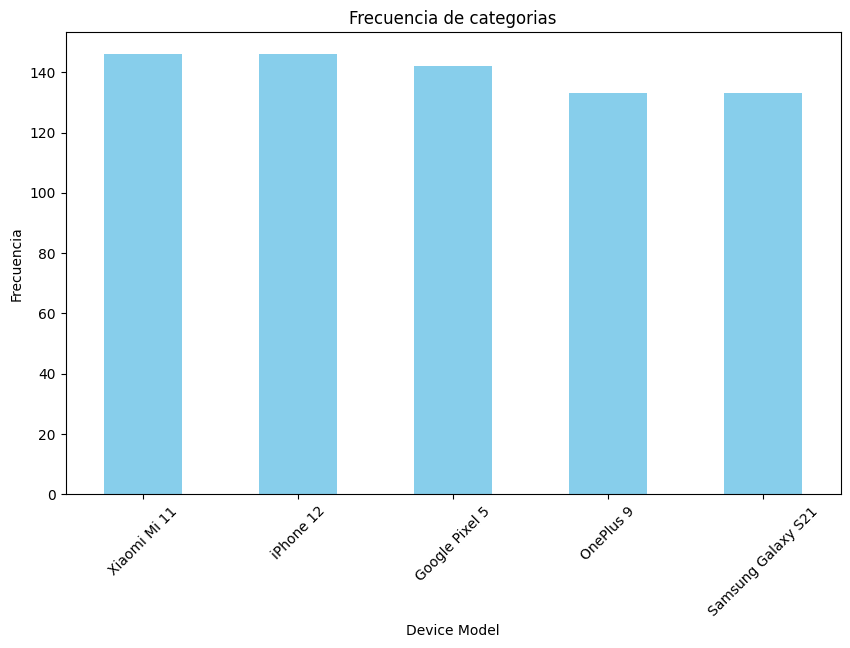

In [22]:
#Calcular la frecuencia de cada categoria
frecuencias = df['Device Model'].value_counts()

#Crear el gráfico de barras
plt.figure(figsize=(10,6)) # tamaño del gráfico (ancho=10, alto=6)
frecuencias.plot(kind='bar', color='skyblue') # genera el gráfico de barras con barras de color azul claro

#Personalización del gráfico
plt.title('Frecuencia de categorias') #Título del gráfico
plt.xlabel('Device Model') # Etiqueta del eje x
plt.ylabel('Frecuencia') # Etiqueta del eje y
plt.xticks(rotation=45) # Rota las etiquetas del eje x 45 grados

#Mostrar el gráfico
plt.show()

##### Diagrama de pizza
Presenta la proporción de cada categoría en un formato circular.

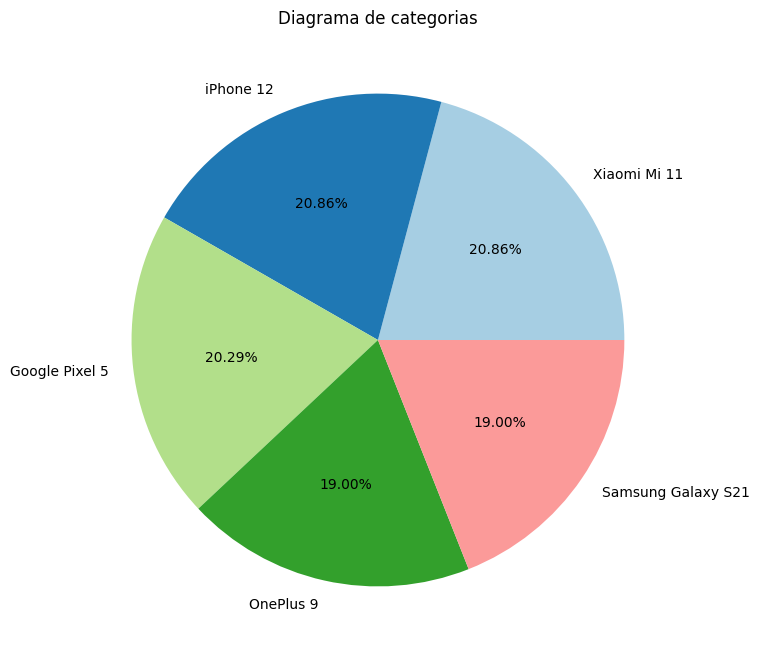

In [28]:
#calcular la proporcion de cada categoria
proporciones = df['Device Model'].value_counts(normalize=True)

#crear el diagrama de torta
plt.figure(figsize=(8,8)) # Tamaño del gráfico
plt.pie(proporciones, labels=proporciones.index, autopct='%1.2f%%', colors=plt.cm.Paired.colors)

# proporciones: Contiene los datos para el gráfico
# labels: son las etiquetas de cada categoria
# autopct: muestra el porcentaje en cada segmento del gráfico
# colors: asigna una paleta de colores para los sectores

# titulo
plt.title('Diagrama de categorias')

#Mostrar el gráfico
plt.show()

##### Diagrama de dona

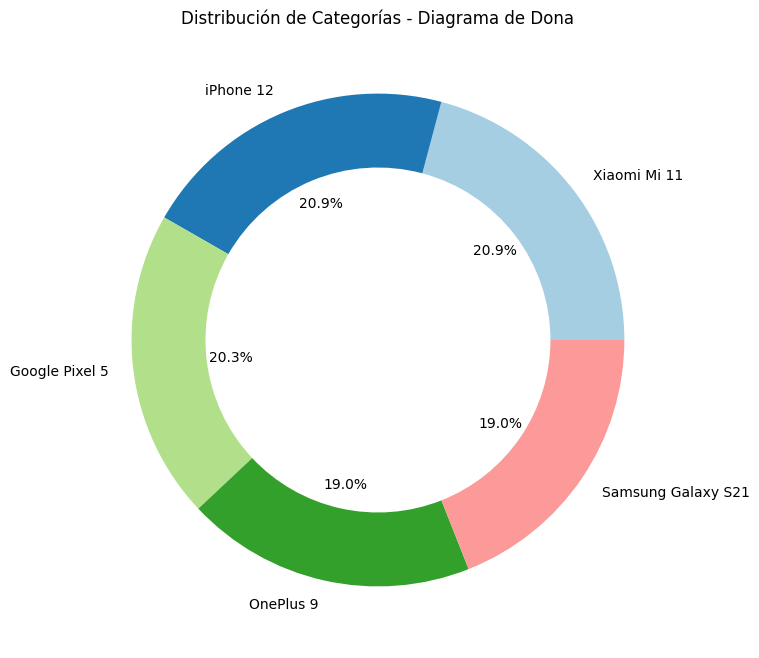

In [34]:
proporciones = df['Device Model'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors,
        wedgeprops={'width': 0.3})  # 'width' controla el ancho del sector para crear la forma de dona
# - 'proporciones' contiene los datos para el gráfico
# - 'labels' son las etiquetas de cada categoría
# - 'autopct' muestra el porcentaje en cada segmento del gráfico
# - 'colors' asigna una paleta de colores para los sectores
# - 'wedgeprops' con 'width' ajusta el ancho del sector para crear el agujero

plt.title('Distribución de Categorías - Diagrama de Dona')  # Título del gráfico

plt.show()

##### Gráfico de pareto
Combina un gráfico de barras con una línea que muestra la acumulación de frecuencia relativa.

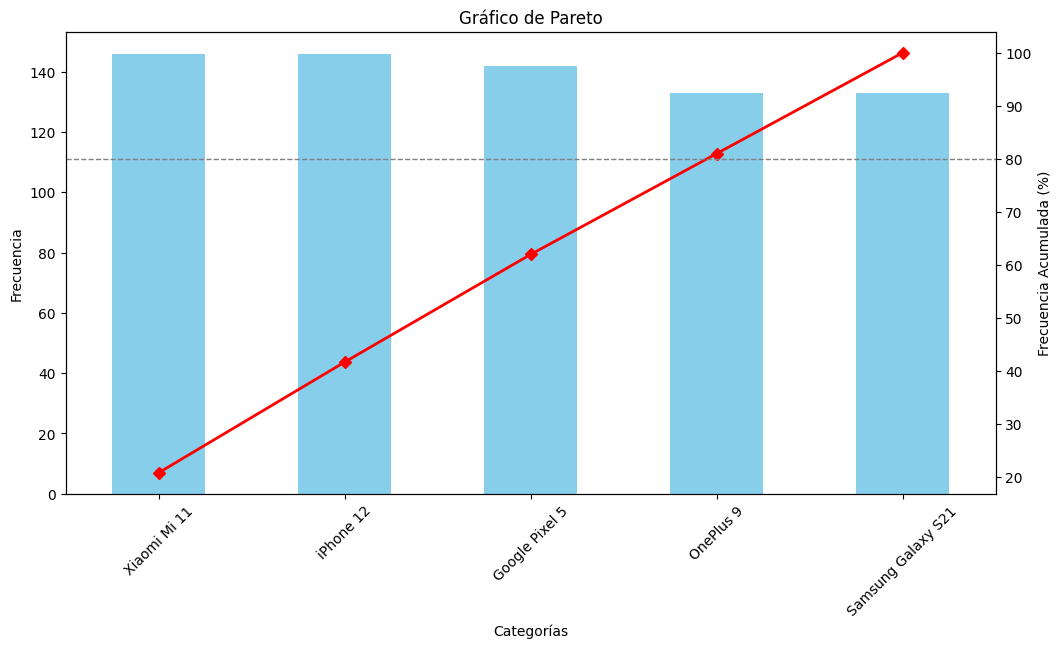

In [35]:
# Calcula la frecuencia de cada categoría en orden descendente
frecuencias = df['Device Model'].value_counts()

# Calcula la frecuencia acumulativa en porcentaje
frecuencia_acumulada = frecuencias.cumsum() / frecuencias.sum() * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))  # Establece el tamaño del gráfico

# Gráfico de barras para las frecuencias
frecuencias.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Gráfico de Pareto')
ax1.set_xlabel('Categorías')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje x

# Gráfico de línea para la frecuencia acumulada
ax2 = ax1.twinx()  # Crea un segundo eje y
ax2.plot(frecuencia_acumulada, color='red', marker='D', linestyle='-', linewidth=2)
ax2.set_ylabel('Frecuencia Acumulada (%)')

# Agrega una línea horizontal al 80% para referencia
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()

#### Operating system

##### Frecuencia absoluta